In this notebook, we will try and explore the basic information about the dataset given. The dataset for this competition is a relational set of files describing customers' orders over time. 

**Objective:** 

The goal of the competition is to predict which products will be in a user's next order. The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users.

For each user, 4 and 100 of their orders are given, with the sequence of products purchased in each order

Let us start by importing the necessary modules.

## コンペの概要
このノートブックでは、与えられたデータセットに関して、基本情報を探索してみましょう。 このコンペのデータセットは、時間の経過とともに顧客の注文を記述するファイルのリレーショナルセットです。

**目的：**  
このコンペの目標は、どの製品がユーザーの次の申し込みになるかを予測することです。 このデータセットは匿名化されており、インスタカートの20万人以上のユーザーから、300万件を超える食料品の注文データのサンプルを提供しています。
各ユーザーに対して、4つの注文と100の注文が与えられ、各注文で購入された製品の順番も含まれております。
必要なモジュールをインポートすることから始めましょう。

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

## IMPORT
・numpyが「linear algebra」＝線形代数とコメントされています。numpyは効率的な数値計算を行うための多次元配列（ベクトルや行列など）のサポートをPythonに加えています。    
・pandasはデータ解析を支援する機能を提供するライブラリです。数表および時系列データを操作するためのデータ構造と演算を提供します。    
・matplotlibは科学計算用ライブラリNumPyのためのグラフ描画ライブラリです。様々な種類のグラフを描画することができます。    
・seabornはPythonでグラフを描画するためのライブラリです。matplotlibをベースとしたライブラリです。matplotlibのデフォルトよりも美しいグラフ描画が可能。　  　
・%matplotlib inlineは、Jupyter Notebookで、ノートブック上にグラフを描画する際に指定する記述です。    
・pandas pd.options.mode.chained_assignment = Noneはコードを高速化するようです。 

Let us list out the files that are present in this competition.!

このコンペのファイルをリストアップしましょう。

In [2]:
from subprocess import check_output
print(check_output(["ls",  "/Users/tsuneo/git/week3-EDA_1"]).decode("utf8"))

aisles.csv
departments.csv
order_products__prior.csv
order_products__train.csv
orders.csv
products.csv
sample_submission.csv



## ファイル一覧の表示
subprocessは、シェルスクリプト的な使い方をしたいときに便利なモジュールです。ダウンロードしたファイルを一覧に表示します。

Before we dive deep into the exploratory analysis, let us know a little more about the files given. To understand it better, let us first read all the files as dataframe objects and then look at the top few rows.

私たちが探索的分析に深く入る前に、与えられたファイルの中身についてもう少し知っておきましょう。 それをよりよく理解するためには、最初にすべてのファイルをデータフレームオブジェクトとして読み込み、上の数行を見てみましょう。

In [3]:
order_products_train_df = pd.read_csv("/Users/tsuneo/git/week3-EDA_1/order_products__train.csv")
order_products_prior_df = pd.read_csv("/Users/tsuneo/git/week3-EDA_1/order_products__prior.csv")
orders_df = pd.read_csv("/Users/tsuneo/git/week3-EDA_1/orders.csv")
products_df = pd.read_csv("/Users/tsuneo/git/week3-EDA_1/products.csv")
aisles_df = pd.read_csv("/Users/tsuneo/git/week3-EDA_1/aisles.csv")
departments_df = pd.read_csv("/Users/tsuneo/git/week3-EDA_1/departments.csv")

## CSVファイルの読み込み処理
pd.read_csvメソッドは、csvファイルをpandas.DataFrameとして読み込むために、pandasの関数read_csv()を使います。
pandasのDataFrameとは、ざっくり言うと二次元配列に相当します。ちなみにpd.Series() を用いて、1 次元のリスト (Series, シリーズと呼ばれます) を作成できます。

In [4]:
orders_df.head()

# tomomasa_add -start-
# 以下のコードでも、ユーザの数をカウントすることができる。206,209人です。
#orders_df.groupby('user_id').mean()
# tomomasa_add -end-

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


## 表のコメント
・行数の多いpandas.DataFrame,のデータを確認するときに、先頭（最初）と末尾（最後）の行の要素を返すメソッドhead()とtail()があります。今回は先頭なのでhead()を利用します。  引数がブランクですが、３などの数字を入れるとその行数分が表示されます。  
・order_dowは、0 is Sunday and 6 is Saturday.である。つまり曜日を表現している。０：日曜日、１：月曜日、２：火曜日、３：水曜日、４：木曜日、５：金曜日、６：土曜日

In [5]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


As we could see, orders.csv has all the information about the given order id like the user who has purchased the order, when was it purchased, days since prior order and so on.

The columns present in order_products_train and order_products_prior are same. Then what is the difference between these files.?

As mentioned earlier, in this dataset, 4 to 100 orders of a customer are given (we will look at this later) and we need to predict the products that will be re-ordered. So the last order of the user has been taken out and divided into train and test sets. All the prior order informations of the customer are present in order_products_prior file.  We can also note that there is a column in orders.csv file called eval_set which tells us as to which of the three datasets (prior, train or test) the given row goes to.

Order_products*csv file has more detailed information about the products that been bought in the given order along with the re-ordered status.

Let us first get the count of rows in each of the three sets.

わかったように、orders.csvには、注文を購入したユーザー、注文した日、前の注文日などのような、指定した注文IDに関するすべての情報が含まれています。

order_products_trainとorder_products_priorにある列は同じです。次に、これらのファイルの違いは何ですか？

前述のように、このデータセットでは、顧客の4から100の注文が与えられます（これについては後で説明します）、再注文される製品を予測する必要があります。ユーザーの最後の注文が取り出され、訓練とテストセットに分かれています。 order_products_priorファイルには、顧客のすべての事前注文情報が含まれています。また、eval_setと呼ばれるorders.csvファイルには、与えられた行がどの3つのデータセット（先行、訓練またはテスト）のどれに向いているかを示す列があります。

Order_products * csvファイルには、指定された順序で購入された製品に関する詳しい情報と、並べ替えられた状態が含まれています。

最初に、3つのセットのそれぞれの行の数を取得しましょう。

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64


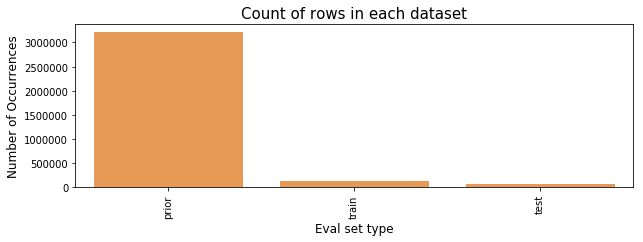

In [7]:
cnt_srs = orders_df.eval_set.value_counts()
# tomomasa_add  -start-
print(cnt_srs)
# tomomasa_add  -end-
plt.figure(figsize=(10,3))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

## orders_dfの「eval_set」項目別件数
・orders.csvファイルの「eval_set」項目の中のデータをgroup byした件数を取得している。  
・plt.figure(figsize=(12,8))は、図の枠組みのサイズを決める引数です。  
・seaborn.barplotメソッドは、与えられたベクトル (数値で構成される配列) の平均値を高さとして、信頼区間をエラーバーとして出力します。

In [8]:
def get_unique_count(x):
    return len(np.unique(x))

cnt_srs = orders_df.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

# tomomasa_add -start-
#cnt_srs2 = orders_df.groupby("order_number")["user_id"].aggregate(get_unique_count)
#cnt_srs2
# tomomasa_add -end-

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

## 上記プログラムの自分の理解
・get_unique_count関数では、まず、np.unique(x)では配列データ中の要素で、重複を無くした値を取得します。その値に対して、要素数を取得するlen関数を使っています。  
・pandas.DataFrameのgroupby()メソッドでグルーピング（グループ分け）する。  
・グループごとに値を求めて表を作るような操作を Aggregation と呼ぶ。GroupBy オブジェクトには Aggregation に使う関数が幾つか定義されているが、これらは agg() を使っても実装出来る。  
・ただ、get_unique_count関数が引数を指定していないのに実行できているのがよく理解できていません。

So there are 206,209 customers in total. Out of which, the last purchase of 131,209 customers are given as train set and we need to predict for the rest 75,000 customers. 

Now let us validate the claim that 4 to 100 orders of a customer are given. 

だから合計206,209人の顧客がいる。 そのうち、131,209人の顧客の最後の購入が訓練セットとして与えられ、残りの75,000人の顧客を予測する必要があります。

今度は、顧客の4から100件の注文が与えられたという主張を検証しましょう。

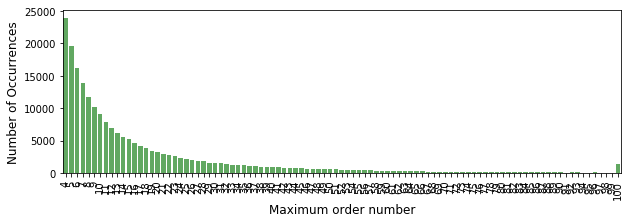

In [9]:
cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(10,3))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

So there are no orders less than 4 and is max capped at 100 as given in the data page. 

Now let us see how the ordering habit changes with day of week.

したがって、4未満の注文はなく、データページで指定されているように、100で上限になります。  
今、注文習慣が曜日によってどのように変化するかを見てみましょう。

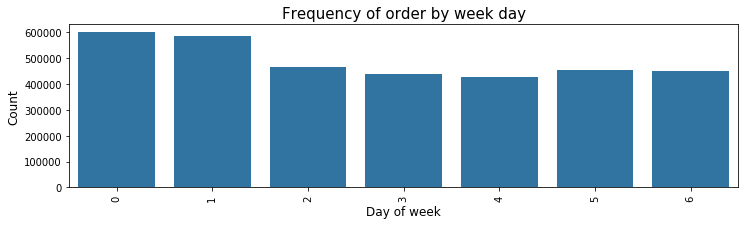

In [10]:
plt.figure(figsize=(12,3))
sns.countplot(x="order_dow", data=orders_df, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

## 曜日別の注文件数
・seaborn.countplotメソッドは、データの件数を集計し、ヒストグラムとして出力します。x軸は曜日を表すorder_dowを指定しています。dataは集計対象のデータフレームです。  
・plt.xticks(rotation='vertical')で、x軸の数字（０〜６：日曜日〜土曜日）を90度変える処理です。

Seems like 0 and 1 is Saturday and Sunday when the orders are high and low during Wednesday.

Now we shall see how the distribution is with respect to time of the day.

水曜日に受注が高値と安値の土曜日と日曜日は0と1のようです。  
次に、その日の時間に関してどのように分布しているかを見てみましょう。

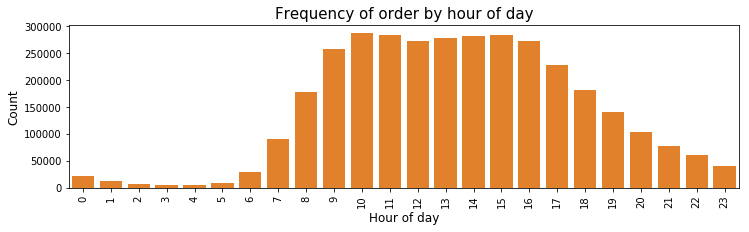

In [11]:
plt.figure(figsize=(12,3))
sns.countplot(x="order_hour_of_day", data=orders_df, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

## 時間帯別の注文件数
・特に新しい構文はありません。x軸を時間帯に変更しています。  
・前回の表は、曜日毎であったが、今回は時間毎の分布です。  
・10時から16時が購買のピークのようです。

So majority of the orders are made during day time. Now let us combine the day of week and hour of day to see the distribution.

したがって、注文の大半は昼間に行われます。 さて、曜日と時間を組み合わせて分布を見てみましょう。

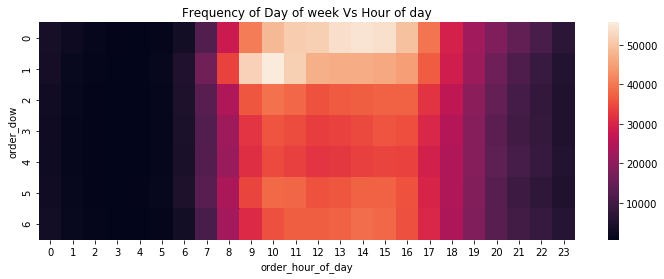

In [12]:
grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,4))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

## 曜日別の注文時間帯
・曜日と時間帯でグルーピングして、ピボット関数を使用してその戻り値を描画している。  
・seaborn.heatmapメソッドは、色の濃淡や色相でデータの密度や値の分布を可視化します。

Seems Satuday evenings and Sunday mornings are the prime time for orders.

Now let us check the time interval between the orders.

土曜日の夕方と日曜日の朝は、注文のピーク時間帯のようです。さて、注文間の時間間隔を確認しましょう。

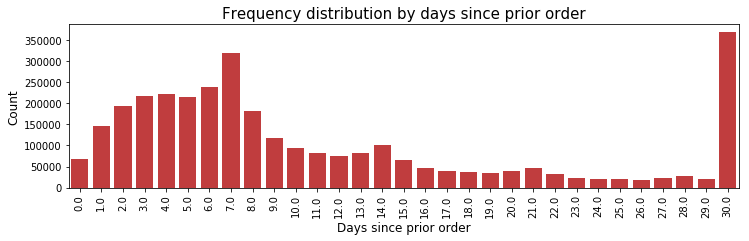

In [13]:
plt.figure(figsize=(12,3))
sns.countplot(x="days_since_prior_order", data=orders_df, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

## 注文間隔の分布
・x軸に事前注文の日にちを取っている。

Looks like customers order once in every week (check the peak at 7 days) or once in a month (peak at 30 days). We could also see smaller peaks at 14, 21 and 28 days (weekly intervals).

Since our objective is to figure out the re-orders, let us check out the re-order percentage in prior set and train set.

顧客は毎週1回（ピークを7日で確認）、または1ヶ月に1回（30日でピーク）のように見えます。 また、14日、21日および28日（週ごとの間隔）でより小さいピークを見ることができた。

私たちの目的は再注文を把握することなので、事前セットと訓練セットの再注文率をチェックしてみましょう。

In [14]:
# percentage of re-orders in prior set #
order_products_prior_df.reordered.sum() / order_products_prior_df.shape[0]

0.5896974667922161

In [15]:
# tomomasa_add -start-
# priorセットの再注文の割合
# order_products_prior_dfの追加注文したもの（reordered）を合計した値を、order_products_prior_dfの行数で割っている。
print( order_products_prior_df.shape)
print('分子',"{:,}".format(order_products_prior_df.reordered.sum()))
print('分母',"{:,}".format(order_products_prior_df.shape[0]))
# tomomasa_add -end-

(32434489, 4)
分子 19,126,536
分母 32,434,489


In [16]:
# percentage of re-orders in train set #
order_products_train_df.reordered.sum() / order_products_train_df.shape[0]

0.5985944127509629

In [17]:
# tomomasa_add -start-
# 訓練セットの再注文の割合
# order_products_train_dfの追加注文したもの（reordered）を合計した値を、order_products_train_dfの行数で割っている。
print( order_products_train_df.shape)
print('分子',"{:,}".format(order_products_train_df.reordered.sum()))
print('分母',"{:,}".format(order_products_train_df.shape[0]))
# tomomasa_add -end-

(1384617, 4)
分子 828,824
分母 1,384,617


On an average, about 59% of the products in an order are re-ordered products.

**No re-ordered products:**

Now that we have seen 59% of the products are re-ordered, there will also be situations when none of the products are re-ordered. Let us check that now.

平均して１注文につき、製品の約59％が再オーダーされた製品です。

再注文された商品はありません：

製品の59％が再注文されたことを確認したので、再注文された商品がない場合もあります。 今すぐ確認しましょう。（友正追記：つまり、41%は新規の商品を購入しているということです。）

In [18]:
grouped_df = order_products_prior_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].ix[grouped_df["reordered"]>1] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

/Users/tsuneo/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


1    0.879151
0    0.120849
Name: reordered, dtype: float64

In [19]:
# tomomasa_add -start-
grouped_df = order_products_prior_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].ix[grouped_df["reordered"]>1] = 1
#print('これは？',grouped_df["reordered"].ix[grouped_df["reordered"]])
#print(type(grouped_df["reordered"].ix[grouped_df["reordered"]>1]))
print('分子：',grouped_df.reordered.value_counts())
print('分母',"{:,}".format(grouped_df.shape[0]))
print(grouped_df.reordered.value_counts() / grouped_df.shape[0])
# tomomasa_add -end-

/Users/tsuneo/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


分子： 1    2826361
0     388513
Name: reordered, dtype: int64
分母 3,214,874
1    0.879151
0    0.120849
Name: reordered, dtype: float64


In [20]:
grouped_df = order_products_train_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].ix[grouped_df["reordered"]>1] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

/Users/tsuneo/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


1    0.93444
0    0.06556
Name: reordered, dtype: float64

About 12% of the orders in prior set has no re-ordered items while in the train set it is 6.5%.

Now let us see the number of products bought in each order.

priorセットの注文の約12％は再注文品がありませんが、訓練セットでは6.5％です。  
さあ、各注文で買った商品の数を見てみましょう。

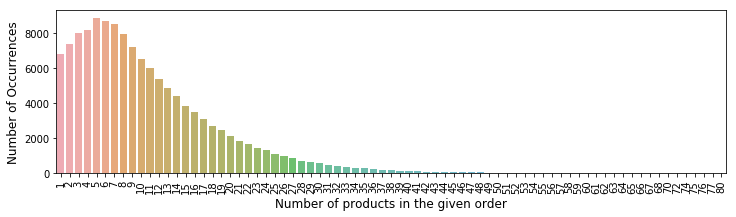

In [21]:
grouped_df = order_products_train_df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,3))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

A right tailed distribution with the maximum value at 5.!

Before we explore the product details, let us look at the other three files as well. 

最大値が5の右尾の分布です。  
製品の詳細を調べる前に、他の3つのファイルも見てみましょう。

In [22]:
products_df.head(3)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7


In [23]:
# tomomasa_add -start
print("{:,}".format(products_df.shape[0]))
#print(products_df['product_id'].value_counts())
# tomomasa_add -end

49,688


In [24]:
aisles_df.head(3)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars


In [25]:
departments_df.head(3)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery


In [26]:
# tomomasa_add -start
#分類は２１種類であることがわかる。
print("{:,}".format(departments_df.shape[0]))
# tomomasa_add -end

21


Now let us merge these product details with the order_prior details.

これらの製品の詳細を、order_priorの詳細とマージしましょう

In [27]:
# tomomasa_add -start-
"{:,}".format(order_products_prior_df.shape[0])
# tomomasa_add -end-

'32,434,489'

In [28]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head(3)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry


In [29]:
# tomomasa_add -start-
print("{:,}".format(order_products_prior_df.shape[0]))
print(order_products_prior_df.shape[1])
# tomomasa_add -end-

32,434,489
9


## order_products_prior_dfとの結合
・pnadas.mergeで２ファイルを結合している。引数のonで、結合する項目を決めている。howで左結合（order_products_prior_df）としている。  
・products_df（製品）,aisles_df（通路）,departments_df（商品分類）の３ファイルを結合している。  
・結合する前と後で、行数に変化が無いことを確認しました。

In [30]:
cnt_srs = order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


## product_name（商品名）毎の購入頻度
・前の処理で結合したファイルをベースに処理を進めている。product_name（商品名）毎の購入頻度を取得している。

Wow. Most of them are organic products.! Also majority of them are fruits. 

Now let us look at the important aisles.

ワオ。 それらのほとんどは有機製品です。 それらの大部分も果物です。  
重要な通路を見てみましょう。

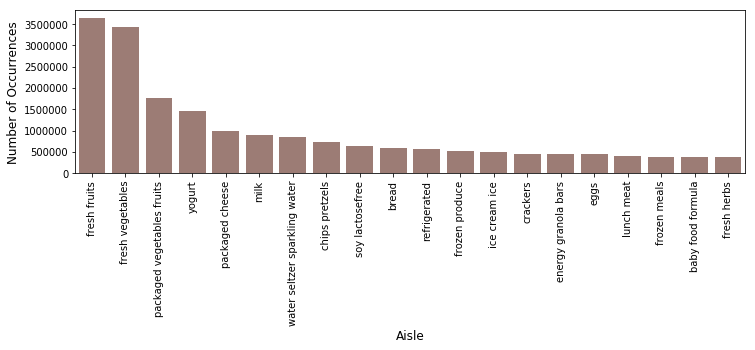

In [31]:
cnt_srs = order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,3))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

## aisle別のカウント
aisle（通路）を基準として、カウントしている。

The top two aisles are fresh fruits and fresh vegetables.! 

**Department Distribution:**

Let us now check the department wise distribution.

トップ2つの通路は、新鮮な果物と新鮮な野菜です。

分類の分布：

分類別の分布を確認しましょう。

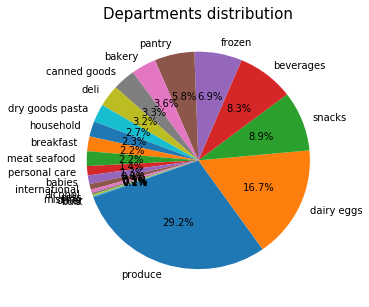

In [32]:
plt.figure(figsize=(5,5))
temp_series = order_products_prior_df['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

In [33]:
# tomomasa_add -start-
print('temp_series.index----------------------------------------')
print(temp_series.index)
print('temp_series----------------------------------------')
print(temp_series)
print('type(temp_series.index)----------------------------------------')
print(type(temp_series.index))
print('type(labels)----------------------------------------')
print(type(labels))
print('labels----------------------------------------')
print(labels)
print('sizes----------------------------------------')
print(sizes)
print('sizes.sum()----------------------------------------')
print(sizes.sum())
# tomomasa_add -end-

temp_series.index----------------------------------------
Index(['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen', 'pantry',
       'bakery', 'canned goods', 'deli', 'dry goods pasta', 'household',
       'breakfast', 'meat seafood', 'personal care', 'babies', 'international',
       'alcohol', 'pets', 'missing', 'other', 'bulk'],
      dtype='object')
temp_series----------------------------------------
produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2690129
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           709569
meat seafood        708931
personal care       447123
babies              423802
international       269253
alcohol             153696
pets                 97724
missing              69145
other                36291
bulk                 34573
Name: department, 

## 分類別の分布
・matplotlib には円グラフを描画するメソッドとして、matplotlib.pyplot.pie が用意されています。 autopct='%1.1f%%'では、小数点以下1 桁まで出力することを指定している。startangle=200とは、一番大きいproduceを開始する角度を指定しています。  
・order_products_prior_df['department_x'].value_counts()で、department（分類）毎にカウントしています。

Produce is the largest department. Now let us check the reordered percentage of each department. 

**Department wise reorder ratio:**

プロデュースは最大の分類です。 さて、各分類の再注文されたパーセンテージを確認しましょう。

部門別再注文率：

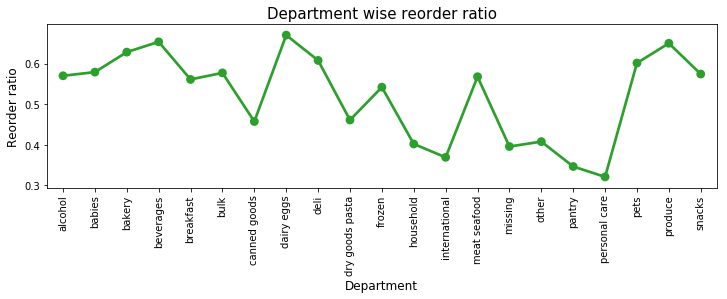

In [34]:
grouped_df = order_products_prior_df.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,3))
sns.pointplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Personal care has lowest reorder ratio and dairy eggs have highest reorder ratio.

**Aisle - Reorder ratio:**

パーソナルケアは再注文率が最も低く、乳製品の卵は再注文率が最も高い。

通路 - 再発注比率：

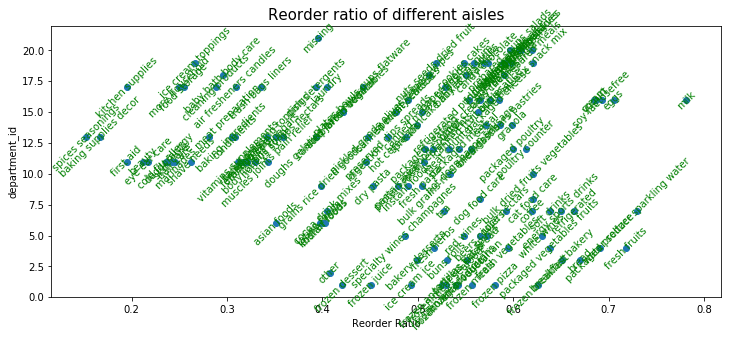

In [35]:
grouped_df = order_products_prior_df.groupby(["department_id", "aisle"])["reordered"].aggregate("mean").reset_index()

fig, ax = plt.subplots(figsize=(12,5))
ax.scatter(grouped_df.reordered.values, grouped_df.department_id.values)
for i, txt in enumerate(grouped_df.aisle.values):
    ax.annotate(txt, (grouped_df.reordered.values[i], grouped_df.department_id.values[i]), rotation=45, ha='center', va='center', color='green')
plt.xlabel('Reorder Ratio')
plt.ylabel('department_id')
plt.title("Reorder ratio of different aisles", fontsize=15)
plt.show()

## 分類毎の再注文比率
・subplots：特定のレイアウトに従う複数のサブプロットを含む図を作成することがよくあります。それを実現するコンビニエンスメソッドplt.subplotsがあります。このメソッドは新たな図を作成し、その図に含まれるサブプロットオブジェクトを要素に持つNumPyの配列を返します。  
・scatterメソッド：散布図を表すことができます。  
・enumerate関数：forループでインデックスを取得できるenumerate関数。Pythonのenumerate()関数を使うと、forループの中でリスト（配列）などのイテラブルオブジェクトの要素と同時にインデックス番号（カウント、順番）を取得できる。

**Add to Cart - Reorder ratio:**

Let us now explore the relationship between how order of adding the product to the cart affects the reorder ratio.

カートに入れる - 再注文比率：

カートに商品を追加する順序が注文比率にどのように影響するかの関係を見てみましょう。

/Users/tsuneo/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


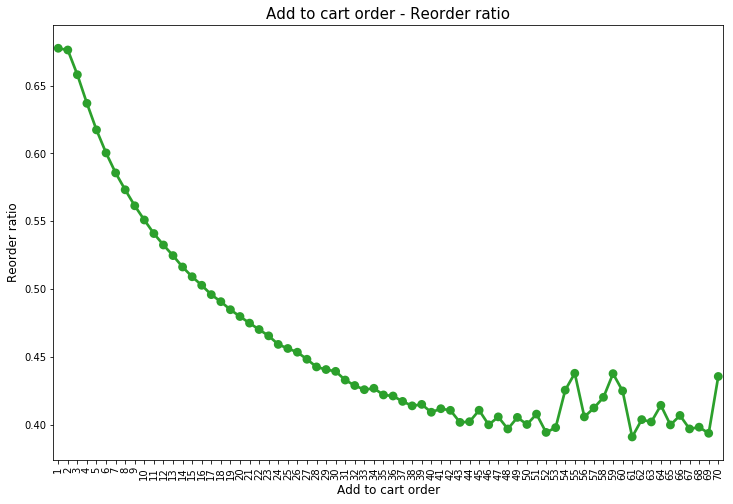

In [36]:
order_products_prior_df["add_to_cart_order_mod"] = order_products_prior_df["add_to_cart_order"].copy()
order_products_prior_df["add_to_cart_order_mod"].ix[order_products_prior_df["add_to_cart_order_mod"]>70] = 70
grouped_df = order_products_prior_df.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

**Looks like the products that are added to the cart initially are more likely to be reordered again compared to the ones added later.** This makes sense to me as well since we tend to first order all the products we used to buy frequently and then look out for the new products available. 

**Reorder ratio by Time based variables:**

最初にカートに追加された商品は、後で追加される商品と比較して、再注文される可能性が高いようです。 これは私が頻繁に購入していたすべての製品を最初に注文し、次に新しい製品を探し出す傾向があるため、私にとっても意味があります。

時間ベースの変数による再注文率：

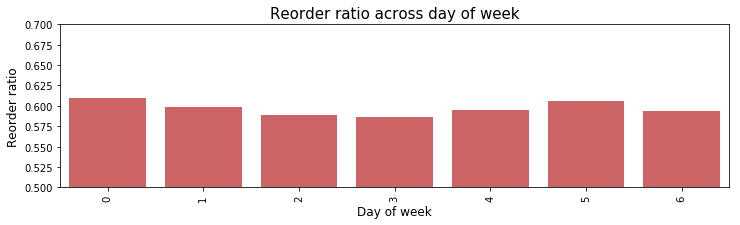

In [37]:
order_products_train_df = pd.merge(order_products_train_df, orders_df, on='order_id', how='left')
grouped_df = order_products_train_df.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,3))
sns.barplot(grouped_df['order_dow'].values, grouped_df['reordered'].values, alpha=0.8, color=color[3])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Reorder ratio across day of week", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

## order_products_train_dfとの結合
・order_products_train_dfとorders_dfの外部結合。  
・曜日別の再注文率を表している。

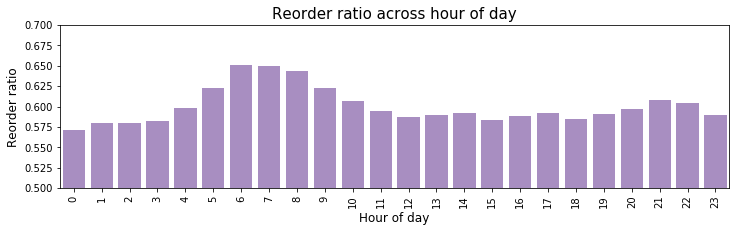

In [38]:
grouped_df = order_products_train_df.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,3))
sns.barplot(grouped_df['order_hour_of_day'].values, grouped_df['reordered'].values, alpha=0.8, color=color[4])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Reorder ratio across hour of day", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

## 時間帯別の再注文の比率
訓練データにおける、時間帯別の再注文の比率を算出している。

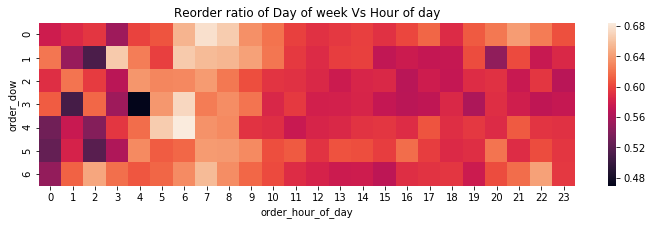

In [39]:

grouped_df = order_products_train_df.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'reordered')

plt.figure(figsize=(12,3))
sns.heatmap(grouped_df)
plt.title("Reorder ratio of Day of week Vs Hour of day")
plt.show()

## 曜日別・時間帯別の再注文比率
訓練データにおいて、曜日別・時間帯別の再注文の比率を算出している。

Looks like reorder ratios are quite high during the early mornings compared to later half of the day.

**Hope it helped. Please leave your comments / suggestions.**

早朝の再注文率は、午後の半日に比べてかなり高いようです。

それが助けてくれたらと思います。 ご意見・ご提案をお寄せください。